**Dataset** : Heart Disease Prediction - Kaggle

**Main Objective** : Prediction

**Description of Dataset and its Attributes:** This is a Dataset from Kaggle which consists of total 14 columns wherein the last columns is the outcome of the prediction to be done. Here, we are asked to predict whether the patient has Heart Disease or not based on the Health information that is inserted by the patient.It contains different types of  information that are important in order to know whether the patient may or may not have Heart disease like
*	Age
*	Gender/Sex
*	Chest pain Type
*	Choletrol
*	Fast Blood Sugar etc...

**Result to be obtained** : The last column is “target” which indicates whether the patient will have Heart Disease or not based on the parameters inserted.


**Steps taken to explore and clean data in order to apply proceed forward:**
*	Importing necessary libraries and loading the data
*	EDA (Exploratory Data Analysis):
   1.	Splitting the columns into numerical and categorical variables
   2.	Preforming Univariant Analysis on Numerical and Categorical Features   separately in order to know which features have constant values
   3.	Preforming Bivariant Analysis on Numerical Features to see which features are highly correlated.
   4.	Finding the number of missing values for all the columns/features.
*	Data processing:
   * There are no "Null" columns or rows in this Dataset so no need of processing much data.
*	Feature Engineering:
   *	Applying “get_dummies” on all Categorical Features
*	Applied train_test_split on the dataset.
*	Applied
    * Logistic Regression
    * Random Tree Classifier
    * Decision Tree Classifier
    * Gradient Boosting Classifier
    * Extra Tree Classifier
    * Xgboost Classifier
    * Xgboost Classifier with Grid Search CV and Hyperparameter Tuning

*	Best Model from all above :
I found that the accuracy was 100% for Traing Data and 97% with Testing Data for "Xgboost Classifier with Grid Search CV and Hyperparameter Tuning".

**Key Findings and Insights :**
   1.	From the data, I found out that some columns had too many null values and dropped them off.
   2.	I found out that there was not much use of implementing Scaling on the data cannot be skipped in Classification problem mostly.
   3.	I found out that there were few Categorical features and applied “Dummies” method to convert them into numerical.


**Suggestions for Further Analysis:**
   1.	In feature selection, we can perform Extra Tree Classifier to get important Features.
   2.	Can also apply different types of splitting of data like Cross validation, KFold, stratified KFold, etc
   3.	Can also apply Hyperparameter Tuning on Parameters of Ridge and Lasso Regression and many more…






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My_Notebooks/ML pipeline/Heart Disease Prediction/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# Needed if train and test data are seperate - merging them togrther
# final_df=pd.concat([train_data,test_data],axis=0)

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<AxesSubplot:>

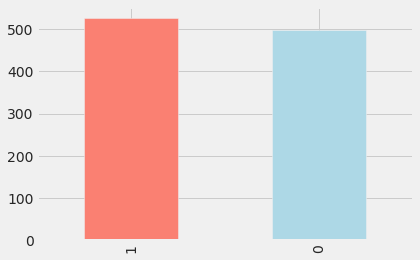

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [ ]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [ ]:
df[df["target"] == 0]["restecg"]

0       1
1       0
2       1
3       1
4       1
       ..
1017    1
1018    0
1021    0
1022    0
1024    1
Name: restecg, Length: 499, dtype: int64

In [ ]:
df[df["target"] == 1]["restecg"]

5       0
10      1
12      1
15      1
16      0
       ..
1011    0
1014    1
1019    1
1020    1
1023    0
Name: restecg, Length: 526, dtype: int64

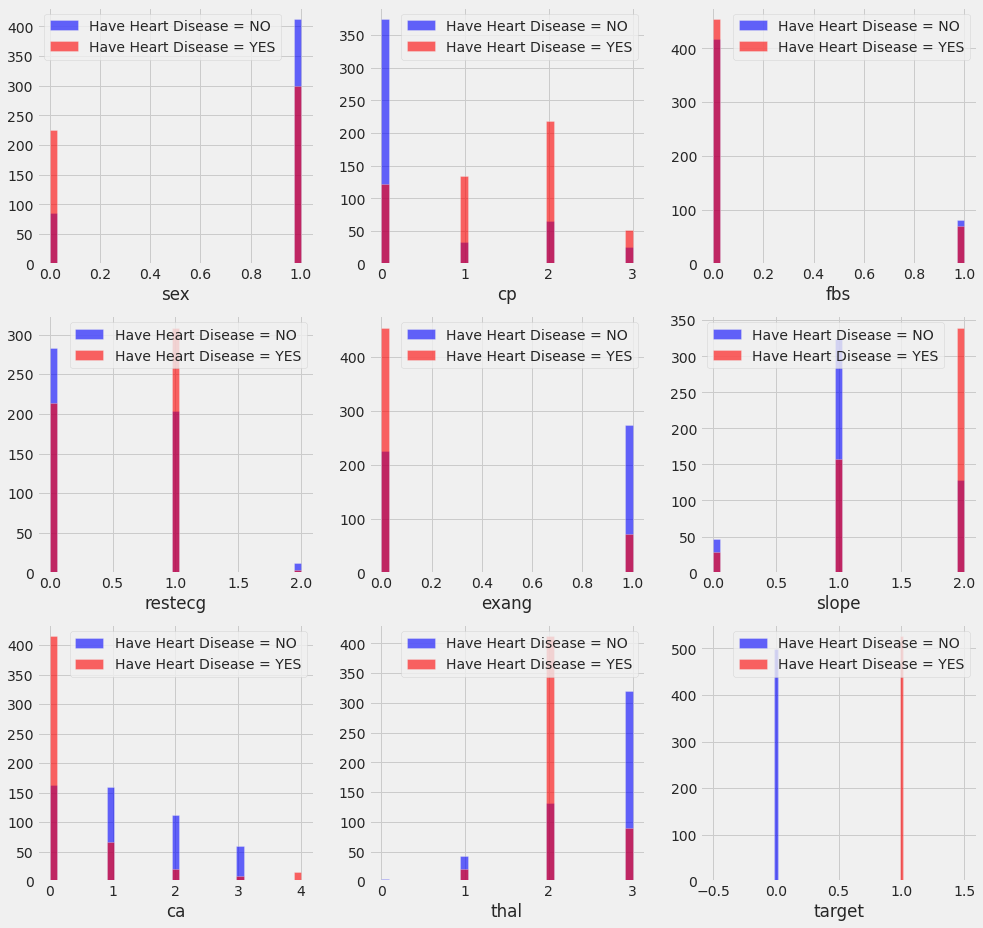

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)   # dark pink color in graph shows overlapping of both blue and red color and y-axis is of population that have /not have heart disease (mostly)

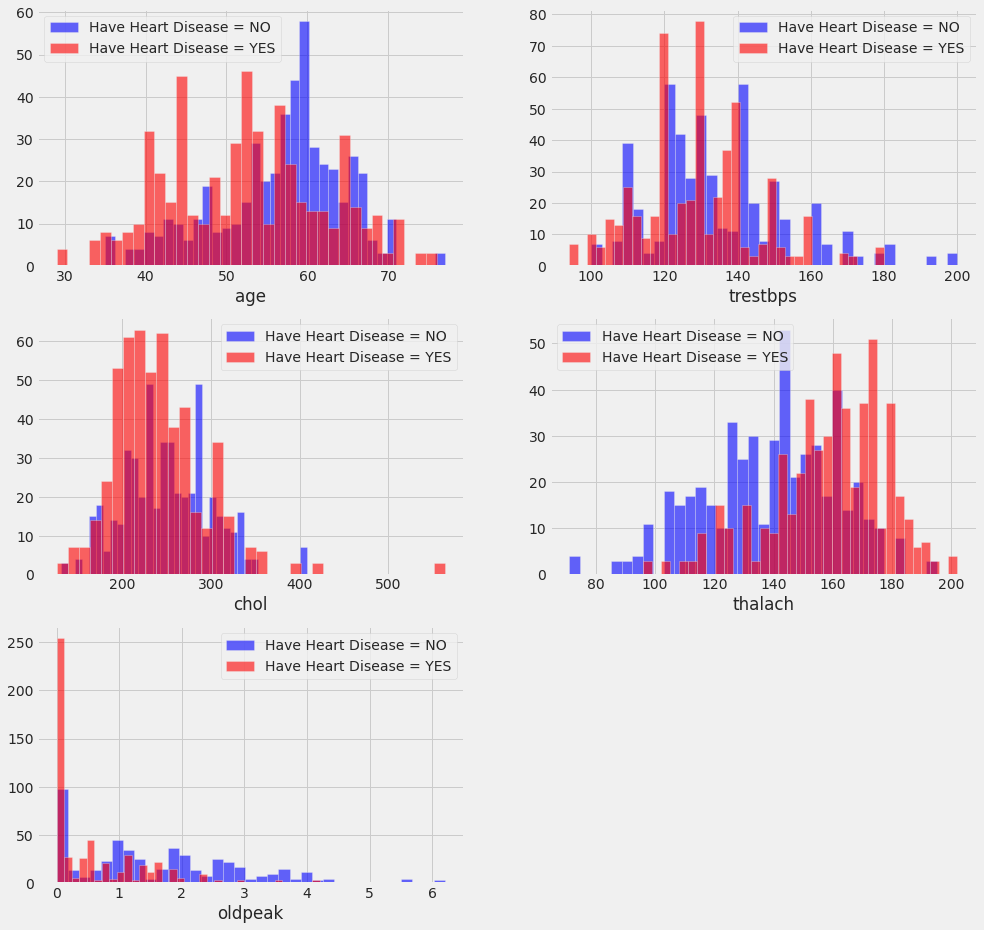

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

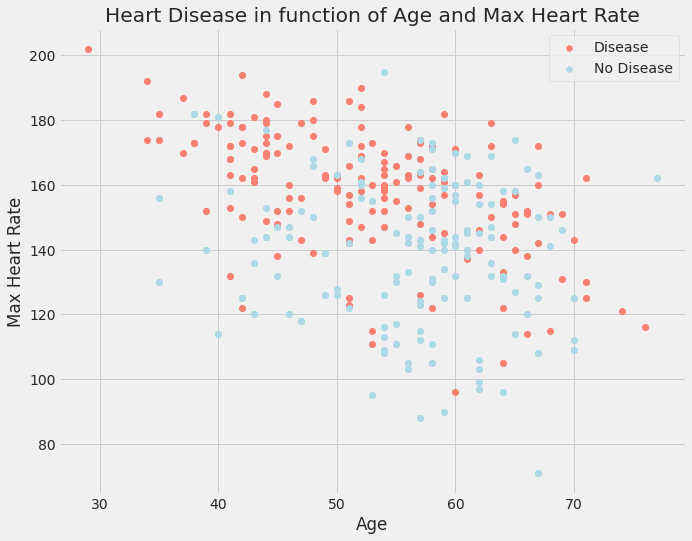

In [ ]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie (have heart disease) examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples (doesn't have heart disease)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

(14.5, -0.5)

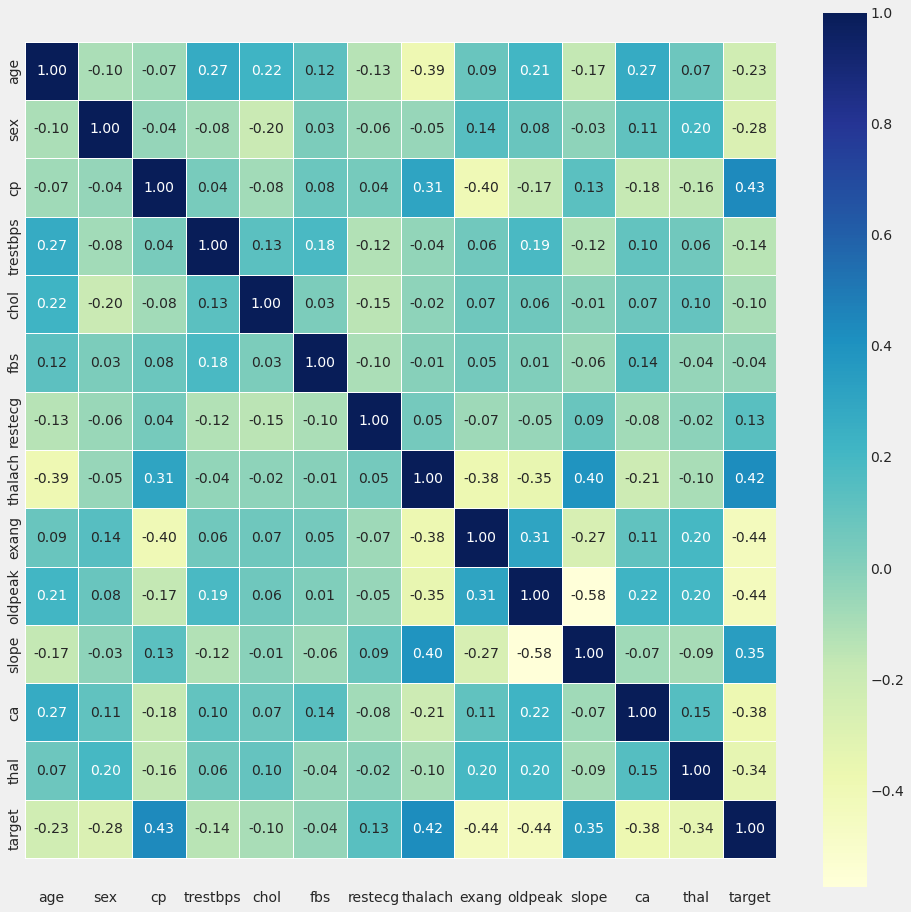

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

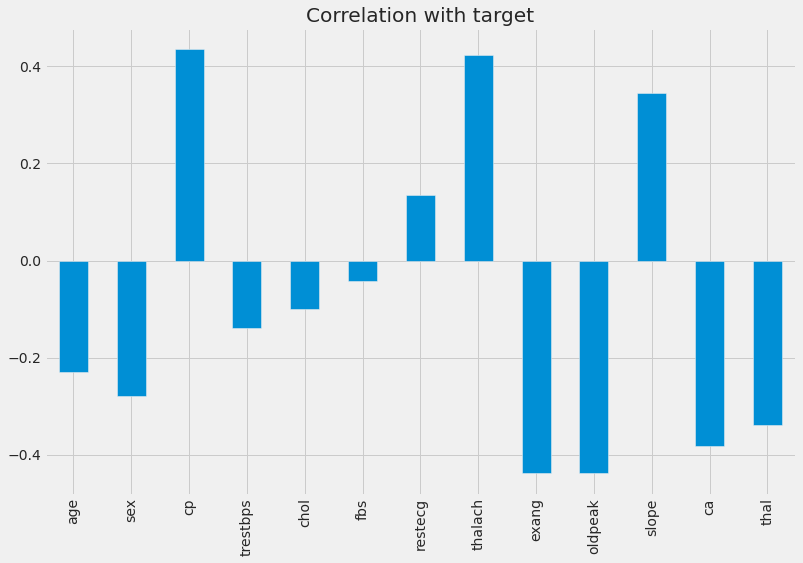

In [ ]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with target")

In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val,drop_first=True)                     # to do  ---> in the html and app.py only changes will be done for this

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()                                                     # to do
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])


In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.27,-0.38,-0.66,0.82,-0.06,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.16,0.48,-0.83,0.26,1.73,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.72,0.76,-1.40,-1.05,1.30,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.72,0.94,-0.83,0.52,-0.91,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.83,0.36,0.93,-1.87,0.71,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
1020,0.50,0.48,-0.48,0.65,-0.91,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
479,0.39,-0.21,-0.58,-0.79,0.96,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
227,-1.15,-0.78,-0.08,-0.00,-0.66,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
910,-0.49,0.48,-0.25,0.60,-0.40,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
362,-1.26,-0.55,-0.64,0.69,-0.74,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-1.48,-0.09,-0.62,0.82,0.79,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
71,0.72,0.48,-0.76,-0.48,0.71,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
106,-0.38,0.48,1.03,1.04,0.45,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
270,-1.26,-1.23,-0.68,0.52,-0.91,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_train.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

#Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train.values, y_train.values)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Train Result:
Accuracy Score: 89.96%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.89      0.90       0.90          0.90
recall      0.88   0.92      0.90       0.90          0.90
f1-score    0.89   0.91      0.90       0.90          0.90
support   340.00 377.00      0.90     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[298  42]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.79      0.82       0.82          0.82
recall      0.79   0.85      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[125  34]
 [ 22 127]]



In [ ]:
lr_clf.coef_[0]

array([ 0.20253109, -0.29174009, -0.55866242,  0.4735912 , -0.58228626,
       -1.5237806 ,  0.93209383,  1.60088531,  1.88956316,  0.19773852,
        0.19484234, -0.14927049, -0.52901999, -0.62761213,  0.56125293,
       -1.90627645, -2.53389577, -1.60102451,  0.67152591,  0.8870455 ,
        1.01272923, -0.46363224])

In [ ]:
lr_clf.intercept_[0]

0.8269642123203521

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=1000, n_features=22,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   0.94      0.95       0.95          0.95
recall      0.94   0.96      0.95       0.95          0.95
f1-score    0.95   0.95      0.95       0.95          0.95
support   499.00 501.00      0.95    1000.00       1000.00
_______________________________________________
Confusion Matrix: 
 [[467  32]
 [ 18 483]]

Test Result:
Accuracy Score: 46.43%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.48   0.45      0.46       0.47          0.47
recall      0.43   0.50      0.46       0.47          0.46
f1-score    0.45   0.48      0.46       0.46          0.46
support   159.00 149.00      0.46     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[68 91]
 [74 75]]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print_score(clf2, X_train, y_train, X_test, y_test, train=True)
print_score(clf2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   499.00 501.00      1.00    1000.00       1000.00
_______________________________________________
Confusion Matrix: 
 [[499   0]
 [  0 501]]

Test Result:
Accuracy Score: 45.45%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.46   0.45      0.45       0.46          0.46
recall      0.31   0.60      0.45       0.46          0.45
f1-score    0.37   0.52      0.45       0.45          0.44
support   159.00 149.00      0.45     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[ 50 109]
 [ 59  90]]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#GradientBoostingClassifier

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:



print_score(clf3, X_train, y_train, X_test, y_test, train=True)
print_score(clf3, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.50%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   0.95      0.95       0.96          0.96
recall      0.95   0.96      0.95       0.95          0.95
f1-score    0.95   0.96      0.95       0.95          0.95
support   499.00 501.00      0.95    1000.00       1000.00
_______________________________________________
Confusion Matrix: 
 [[476  23]
 [ 22 479]]

Test Result:
Accuracy Score: 46.75%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.48   0.45      0.47       0.47          0.47
recall      0.43   0.50      0.47       0.47          0.47
f1-score    0.46   0.48      0.47       0.47          0.47
support   159.00 149.00      0.47     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[69 90]
 [74 75]]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


# ExtraTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf4 = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf4.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [ ]:
print_score(clf4, X_train, y_train, X_test, y_test, train=True)
print_score(clf4, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   499.00 501.00      1.00    1000.00       1000.00
_______________________________________________
Confusion Matrix: 
 [[499   0]
 [  0 501]]

Test Result:
Accuracy Score: 44.48%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.45   0.44      0.44       0.45          0.45
recall      0.38   0.52      0.44       0.45          0.44
f1-score    0.41   0.47      0.44       0.44          0.44
support   159.00 149.00      0.44     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[60 99]
 [72 77]]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


#XgBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
XGB = xgb.XGBClassifier()

In [ ]:
XGB.fit(X_train,y_train)

XGBClassifier()

In [ ]:
print_score(XGB, X_train, y_train, X_test, y_test, train=True)
print_score(XGB, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.77%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   0.97      0.98       0.98          0.98
recall      0.97   0.98      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   340.00 377.00      0.98     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[330  10]
 [  6 371]]

Test Result:
Accuracy Score: 93.51%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.94      0.94       0.94          0.94
recall      0.95   0.92      0.94       0.93          0.94
f1-score    0.94   0.93      0.94       0.93          0.94
support   159.00 149.00      0.94     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[151   8]
 [ 12 137]]



# XgBoost Classifier With Grid Search CV

In [ ]:
params = {
            "learning_rate" :[0.1],
            "n_estimators":[1000],
            "max_depth":[5],
            "min_child_weight":[1],
            "gamma":[0],
            "subsample":[0.8],
            "colsample_bytree":[0.8],
            "objective":['reg:squarederror'],
            "nthread":[4],
            "scale_pos_weight":[1],
            "seed":[27]
        }

grid_xgb_classifier = GridSearchCV(XGB,params,cv=5)
grid_xgb_classifier.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [5],
                         'min_child_weight': [1], 'n_estimators': [1000],
                         'nthread': [4], 'objective': ['reg:squarederror'],
                         'scale_pos_weight': [1], 'seed': [27],
                         'subsample': [0.8]})

In [ ]:
print(grid_xgb_classifier.best_params_)
print(grid_xgb_classifier.best_score_)
grid_xgb_classifier.score(X_train,y_train)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:squarederror', 'scale_pos_weight': 1, 'seed': 27, 'subsample': 0.8}
0.9609362859362859


1.0

In [ ]:
print_score(grid_xgb_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(grid_xgb_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   1.00      0.97       0.97          0.97
recall      1.00   0.94      0.97       0.97          0.97
f1-score    0.97   0.97      0.97       0.97          0.97
support   159.00 149.00      0.97     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  9 140]]



In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.96,81.82


In [ ]:
test_score = accuracy_score(y_test, grid_xgb_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, grid_xgb_classifier.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Xgboost Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Xgboost Classifier,100.00,97.08


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('logistic_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr_clf, file)

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('XGBoost_Classifier_model.pkl', 'wb')

# dump information to that file
pickle.dump(grid_xgb_classifier, file)

##Code for comparing different models

In [ ]:
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn import datasets
# iris = datasets.load_iris()

In [ ]:
#model_params = {
    # 'SVC': {
    #     'model': SVC(gamma='auto'),   # SVC(gamma='scale')
    #     'params' : {
    #         'C': [1,10,20,50,100],
    #         'kernel': ['rbf','linear'],
    #         'gamma': [0.001, 0.0001]
    #     }
    # # },
    # 'random_forest': {
    #     'model': RandomForestClassifier(),
    #     'params' : {
    #         'n_estimators': [1,5,10]
    #     }
    # },
    # 'logistic_regression' : {
    #     'model': LogisticRegression(solver='liblinear',multi_class='auto'),
    #     'params': {
    #         'C': [1,5,10]
    #     }
    # }
# }

In [ ]:
# scores = []

# for model_name, np in model_params.items():
#     clf = GridSearchCV(np["model"],np["params"],cv=5,return_train_score = False)
#     clf.fit(X,y)
#     scores.append({
#         "model" : model_name,
#         "best_score" : clf.best_score_,
#         "best_params" : clf.best_params_
# })

In [ ]:
# scores

In [ ]:
# df = pd.DataFrame(scores,columns=["model","best_score","best_score"])
# df